### Hello everyone! I know this is not a Tumblr post, but this seemed a bit more adequate for me!

# Code
Below you can find the code that I used as well as its output:

INCOMERANGE     0      4999   7999   9999   12999  14999  19999  24999
DMAJORDEPSNI12                                                        
0                 327    618    384    211    474    199    494    390
1                  33     95     68     32     47     29     53     56
INCOMERANGE        0        4999      7999      9999      12999     14999  \
DMAJORDEPSNI12                                                              
0               0.908333  0.86676  0.849558  0.868313  0.909789  0.872807   
1               0.091667  0.13324  0.150442  0.131687  0.090211  0.127193   

INCOMERANGE        19999     24999  
DMAJORDEPSNI12                      
0               0.903108  0.874439  
1               0.096892  0.125561  
chi-square value, p value, expected counts
(15.670543068976041, 0.02830280261102371, 7, array([[317.64102564, 629.10569801, 398.81595442, 214.40769231,
        459.697151  , 201.17264957, 482.63789174, 393.52193732],
       [ 42.35897436,  83.89430199,  53.18

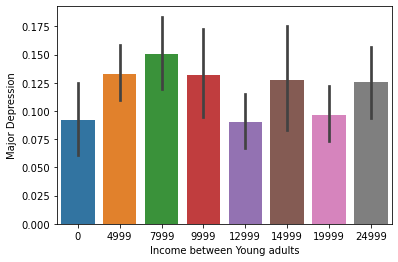

COMP0v4999      0.0     4999.0
DMAJORDEPSNI12                
0                  327     618
1                   33      95
COMP0v4999        0.0      4999.0
DMAJORDEPSNI12                   
0               0.908333  0.86676
1               0.091667  0.13324
chi-square value, p value, expected counts
(3.549527679860077, 0.05956240233898375, 1, array([[317.05498602, 627.94501398],
       [ 42.94501398,  85.05498602]]))
COMP0v7999      0.0     7999.0
DMAJORDEPSNI12                
0                  327     384
1                   33      68
COMP0v7999        0.0       7999.0
DMAJORDEPSNI12                    
0               0.908333  0.849558
1               0.091667  0.150442
chi-square value, p value, expected counts
(5.828078563927238, 0.015772341305019096, 1, array([[315.22167488, 395.77832512],
       [ 44.77832512,  56.22167488]]))
COMP0v9999      0.0     9999.0
DMAJORDEPSNI12                
0                  327     211
1                   33      32
COMP0v9999        0.0    

1                0.096892  0.125561
chi-square value, p value, expected counts
(1.7833676191875347, 0.18173634535513128, 1, array([[486.95669688, 397.04330312],
       [ 60.04330312,  48.95669688]]))


In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

data=pd.read_csv("nesarc.csv",low_memory=False)

#Data for Total Personal Income in the last 12 months (Ages 20-25) (Income between 0=25000$)
A1 = data[(data['AGE'] >= 20) & (data['AGE'] <= 25) & (data['S1Q10B'] >= 0) & (data['S1Q10B'] <= 7)]
B1 = A1.copy()

recode= {0:0,1:4999,2:7999,3:9999,4:12999,5:14999,6:19999,7:24999}
B1['INCOMERANGE']=B1['S1Q10B'].map(recode)
d1=B1['INCOMERANGE'].value_counts(sort=False)

# contingency table of observed counts
ct1=pd.crosstab(B1['DMAJORDEPSNI12'], B1['INCOMERANGE'])
print (ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print(cs1)

# set variable types
B1['INCOMERANGE'] = B1['INCOMERANGE'].astype('category')
B1['DMAJORDEPSNI12'] = pd.to_numeric(B1['DMAJORDEPSNI12'], errors='coerce')


# graph percent with nicotine dependence within each smoking frequency group
seaborn.barplot(x="INCOMERANGE", y="DMAJORDEPSNI12", data=B1)
plt.xlabel('Income between Young adults')
plt.ylabel('Major Depression')
plt.show()

recode2 = {0: 0, 4999: 4999}
B1['COMP0v4999']= B1['INCOMERANGE'].map(recode2)


# contingency table of observed counts
ct2=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP0v4999'])
print(ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print(cs2)

recode3 = {0: 0, 7999: 7999}
B1['COMP0v7999']= B1['INCOMERANGE'].map(recode3)

# contingency table of observed counts
ct3=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP0v7999'])
print(ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print(cs3)

recode4 = {0: 0, 9999: 9999}
B1['COMP0v9999']= B1['INCOMERANGE'].map(recode4)

# contingency table of observed counts
ct4=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP0v9999'])
print(ct4)

# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

print('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print(cs4)

recode5 = {0: 0, 12999: 12999}
B1['COMP0v12999']= B1['INCOMERANGE'].map(recode5)

# contingency table of observed counts
ct5=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP0v12999'])
print(ct5)

# column percentages
colsum=ct5.sum(axis=0)
colpct=ct5/colsum
print(colpct)

print('chi-square value, p value, expected counts')
cs5= scipy.stats.chi2_contingency(ct5)
print(cs5)

recode6 = {0: 0, 14999: 14999}
B1['COMP0v14999']= B1['INCOMERANGE'].map(recode6)

# contingency table of observed counts
ct6=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP0v14999'])
print(ct6)

# column percentages
colsum=ct6.sum(axis=0)
colpct=ct6/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs6= scipy.stats.chi2_contingency(ct6)
print(cs6)

recode7 = {0: 0, 19999: 19999}
B1['COMP0v19999']= B1['INCOMERANGE'].map(recode7)

# contingency table of observed counts
ct7=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP0v19999'])
print(ct7)

# column percentages
colsum=ct7.sum(axis=0)
colpct=ct7/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs7=scipy.stats.chi2_contingency(ct7)
print(cs7)

recode8 = {0: 0, 24999: 24999}
B1['COMP0v24999']= B1['INCOMERANGE'].map(recode8)

# contingency table of observed counts
ct8=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP0v24999'])
print(ct8)

# column percentages
colsum=ct8.sum(axis=0)
colpct=ct8/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs8=scipy.stats.chi2_contingency(ct8)
print(cs8)

recode9 = {4999: 4999, 7999: 7999}
B1['COMP4999v7999']= B1['INCOMERANGE'].map(recode9)

# contingency table of observed counts
ct9=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP4999v7999'])
print(ct9)

# column percentages
colsum=ct9.sum(axis=0)
colpct=ct9/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs9=scipy.stats.chi2_contingency(ct9)
print(cs9)

recode10 = {4999: 4999, 9999: 9999}
B1['COMP4999v9999']= B1['INCOMERANGE'].map(recode10)

# contingency table of observed counts
ct10=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP4999v9999'])
print(ct10)

# column percentages
colsum=ct10.sum(axis=0)
colpct=ct10/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs10=scipy.stats.chi2_contingency(ct10)
print(cs10)

recode11 = {4999: 4999, 12999: 12999}
B1['COMP4999v12999']= B1['INCOMERANGE'].map(recode11)

# contingency table of observed counts
ct11=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP4999v12999'])
print(ct11)

# column percentages
colsum=ct11.sum(axis=0)
colpct=ct11/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs11=scipy.stats.chi2_contingency(ct11)
print(cs11)

recode12 = {4999: 4999, 14999: 14999}
B1['COMP4999v14999']= B1['INCOMERANGE'].map(recode12)

# contingency table of observed counts
ct12=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP4999v14999'])
print(ct12)

# column percentages
colsum=ct12.sum(axis=0)
colpct=ct12/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs12=scipy.stats.chi2_contingency(ct12)
print(cs12)

recode13 = {4999: 4999, 19999: 19999}
B1['COMP4999v19999']= B1['INCOMERANGE'].map(recode13)

# contingency table of observed counts
ct13=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP4999v19999'])
print(ct13)

# column percentages
colsum=ct13.sum(axis=0)
colpct=ct13/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs13=scipy.stats.chi2_contingency(ct13)
print(cs13)

recode14 = {4999: 4999, 24999: 24999}
B1['COMP4999v24999']= B1['INCOMERANGE'].map(recode14)

# contingency table of observed counts
ct14=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP4999v24999'])
print(ct14)

# column percentages
colsum=ct14.sum(axis=0)
colpct=ct14/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs14=scipy.stats.chi2_contingency(ct14)
print(cs14)


recode15 = {7999: 7999, 9999: 9999}
B1['COMP7999v9999']= B1['INCOMERANGE'].map(recode15)

# contingency table of observed counts
ct15=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP7999v9999'])
print(ct15)

# column percentages
colsum=ct15.sum(axis=0)
colpct=ct15/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs15=scipy.stats.chi2_contingency(ct15)
print(cs15)

recode16 = {7999: 7999, 12999: 12999}
B1['COMP7999v12999']= B1['INCOMERANGE'].map(recode16)

# contingency table of observed counts
ct16=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP7999v12999'])
print(ct16)

# column percentages
colsum=ct16.sum(axis=0)
colpct=ct16/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs16=scipy.stats.chi2_contingency(ct16)
print(cs16)

recode17 = {7999: 7999, 14999: 14999}
B1['COMP7999v14999']= B1['INCOMERANGE'].map(recode17)

# contingency table of observed counts
ct17=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP7999v14999'])
print(ct17)

# column percentages
colsum=ct17.sum(axis=0)
colpct=ct17/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs17=scipy.stats.chi2_contingency(ct16)
print(cs17)


recode18 = {7999: 7999, 19999: 19999}
B1['COMP7999v19999']= B1['INCOMERANGE'].map(recode18)

# contingency table of observed counts
ct18=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP7999v19999'])
print(ct18)

# column percentages
colsum=ct18.sum(axis=0)
colpct=ct18/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs18=scipy.stats.chi2_contingency(ct16)
print(cs18)

recode19 = {7999: 7999, 24999: 24999}
B1['COMP7999v24999']= B1['INCOMERANGE'].map(recode19)

# contingency table of observed counts
ct19=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP7999v24999'])
print(ct19)

# column percentages
colsum=ct19.sum(axis=0)
colpct=ct19/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs19=scipy.stats.chi2_contingency(ct19)
print(cs19)


recode20 = {9999: 9999, 12999: 12999}
B1['COMP9999v12999']= B1['INCOMERANGE'].map(recode20)

# contingency table of observed counts
ct20=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP9999v12999'])
print(ct20)

# column percentages
colsum=ct20.sum(axis=0)
colpct=ct20/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs20=scipy.stats.chi2_contingency(ct20)
print(cs20)

recode21 = {9999: 9999, 14999: 14999}
B1['COMP9999v14999']= B1['INCOMERANGE'].map(recode21)

# contingency table of observed counts
ct21=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP9999v14999'])
print(ct21)

# column percentages
colsum=ct21.sum(axis=0)
colpct=ct21/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs21=scipy.stats.chi2_contingency(ct21)
print(cs21)

recode22 = {9999: 9999, 19999: 19999}
B1['COMP9999v19999']= B1['INCOMERANGE'].map(recode22)

# contingency table of observed counts
ct22=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP9999v19999'])
print(ct22)

# column percentages
colsum=ct22.sum(axis=0)
colpct=ct22/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs22=scipy.stats.chi2_contingency(ct22)
print(cs22)

recode23 = {9999: 9999, 24999: 24999}
B1['COMP9999v24999']= B1['INCOMERANGE'].map(recode23)

# contingency table of observed counts
ct23=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP9999v24999'])
print(ct23)

# column percentages
colsum=ct23.sum(axis=0)
colpct=ct23/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs23=scipy.stats.chi2_contingency(ct23)
print(cs23)

recode24 = {12999: 12999, 14999: 14999}
B1['COMP12999v14999']= B1['INCOMERANGE'].map(recode24)

# contingency table of observed counts
ct24=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP12999v14999'])
print(ct24)

# column percentages
colsum=ct24.sum(axis=0)
colpct=ct24/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs24=scipy.stats.chi2_contingency(ct24)
print(cs24)

recode25 = {12999: 12999, 19999: 19999}
B1['COMP12999v19999']= B1['INCOMERANGE'].map(recode25)

# contingency table of observed counts
ct25=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP12999v19999'])
print(ct25)

# column percentages
colsum=ct25.sum(axis=0)
colpct=ct25/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs25=scipy.stats.chi2_contingency(ct25)
print(cs25)

recode26 = {12999: 12999, 24999: 24999}
B1['COMP12999v24999']= B1['INCOMERANGE'].map(recode26)

# contingency table of observed counts
ct26=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP12999v24999'])
print(ct26)

# column percentages
colsum=ct26.sum(axis=0)
colpct=ct26/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs26=scipy.stats.chi2_contingency(ct26)
print(cs26)

recode27 = {14999: 14999, 19999: 19999}
B1['COMP14999v19999']= B1['INCOMERANGE'].map(recode27)

# contingency table of observed counts
ct27=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP14999v19999'])
print(ct27)

# column percentages
colsum=ct27.sum(axis=0)
colpct=ct27/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs27=scipy.stats.chi2_contingency(ct27)
print(cs27)

recode28 = {14999: 14999, 24999: 24999}
B1['COMP14999v24999']= B1['INCOMERANGE'].map(recode28)

# contingency table of observed counts
ct28=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP14999v24999'])
print(ct28)

# column percentages
colsum=ct28.sum(axis=0)
colpct=ct28/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs28=scipy.stats.chi2_contingency(ct28)
print(cs28)

recode29 = {19999: 19999, 24999: 24999}
B1['COMP19999v24999']= B1['INCOMERANGE'].map(recode29)

# contingency table of observed counts
ct29=pd.crosstab(B1['DMAJORDEPSNI12'], B1['COMP19999v24999'])
print(ct29)

# column percentages
colsum=ct29.sum(axis=0)
colpct=ct29/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs29=scipy.stats.chi2_contingency(ct29)
print(cs29)

# Examining the results

As we can see in the table, all of the P-Values of our categorical pairs are above the defined alpha which is 0.05. We can conclude with our Chi-square tests that our data does not have show significantly different rates regarding major depression. Therefore, we fail to reject the Null Hypothesis.

Thank you very much for your time!!